In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
import scipy.stats as stats


import matplotlib.pyplot as plt

# 冻结比例

In [89]:
all_data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20201224/12/34812760-题库全貌-冻结知识点-查询18.csv', encoding = 'gb18030')
all_data = all_data[all_data.point_type == '词汇']
all_data['fr'] = all_data['freezed_user'] / all_data['review_user'] 
all_data.head()

,Period,level_name,kp_id,point_type,freezed_user,review_user,fr
0,Period1,A2中,6811316346639384839,词汇,120,960,0.125000
4,Period3,A2中,6811316256004686093,词汇,1283,6149,0.208652
6,Period3,A2初,6839296858028769549,词汇,565,2077,0.272027
8,Period3,A2高,6849724161477067016,词汇,173,1266,0.136651
9,Period1,A2中,6811316256004686093,词汇,3,52,0.057692


In [90]:
# fr_data_tmp = all_data[(all_data.Period != 'Period1') & (all_data.level_name)]
fr_data_tmp = all_data[['Period', 'level_name', 'kp_id', 'fr']]
fr_data_tmp.head()

,Period,level_name,kp_id,fr
0,Period1,A2中,6811316346639384839,0.125000
4,Period3,A2中,6811316256004686093,0.208652
6,Period3,A2初,6839296858028769549,0.272027
8,Period3,A2高,6849724161477067016,0.136651
9,Period1,A2中,6811316256004686093,0.057692


In [94]:
fr_data = fr_data_tmp.pivot(index = ['level_name', 'kp_id'], columns = 'Period', values='fr').reset_index()
fr_data = fr_data.fillna(0)
# fr_data = fr_data.dropna()
fr_data.head()

Period,level_name,kp_id,Period1,Period2,Period3
0,A0,6811316291157147912,0.153846,0.171429,1.000000
1,A0,6811316302603354375,0.055556,0.000000,0.000000
2,A0,6811316319049253127,0.000000,0.064516,0.085366
3,A0,6811316319049285895,0.071186,0.080764,0.154348
4,A0,6811316319720325384,0.000000,0.000000,0.054299


In [95]:
mile_list = fr_data.level_name.unique()
mile_summary = pd.DataFrame(columns = ["level_name", "kp_cnt", "fr_p1", "fr_p2", "fr_p3", "p_value"])

In [96]:
for i in range(0,len(mile_list)):
    mile_id = mile_list[i]
    fr_data_s = fr_data[fr_data.level_name == mile_id]
    
    kp_cnt = len(fr_data_s)
    fr_p1 = fr_data_s.Period1.mean()
    fr_p2 = fr_data_s.Period2.mean()
    fr_p3 = fr_data_s.Period3.mean()
    
    p_value = friedmanchisquare(fr_data_s.Period1, fr_data_s.Period2, fr_data_s.Period3).pvalue
    
    mile_summary = mile_summary.append({'level_name': mile_id, 'kp_cnt': kp_cnt, 'fr_p1': fr_p1, 'fr_p2': fr_p2, 'fr_p3': fr_p3, 'p_value': p_value}, ignore_index = True)

mile_summary

,level_name,kp_cnt,fr_p1,fr_p2,fr_p3,p_value
0,A0,17,0.129694,0.129125,0.130848,7.431369e-01
1,A1中,102,0.118158,0.109244,0.076075,4.527487e-06
2,A1初,60,0.218063,0.096016,0.091544,4.248425e-03
3,A1高,67,0.123600,0.071637,0.064854,7.159581e-02
4,A2中,155,0.119263,0.140570,0.216861,8.814468e-38
5,A2初,141,0.154694,0.165665,0.239398,8.019441e-25
6,A2高,130,0.091952,0.104407,0.197754,6.311686e-39
7,B1中,123,0.087981,0.121905,0.128739,1.192375e-07
8,B1初,130,0.087193,0.106561,0.203961,4.321232e-39
9,B1高,112,0.034538,0.070940,0.137871,3.137148e-32


In [101]:
fr_data_s = fr_data[fr_data['level_name'].isin(['A1初', 'A1中', 'A1高'])]

kp_cnt = len(fr_data_s)
fr_p1 = fr_data_s.Period1.mean()
fr_p2 = fr_data_s.Period2.mean()
fr_p3 = fr_data_s.Period3.mean()

p_value = friedmanchisquare(fr_data_s.Period1, fr_data_s.Period2, fr_data_s.Period3).pvalue

mile_summary = mile_summary.append({'level_name': 'A1' , 'kp_cnt': kp_cnt, 'fr_p1': fr_p1, 'fr_p2': fr_p2, 'fr_p3': fr_p3, 'p_value': p_value}, ignore_index = True)
mile_summary

,level_name,kp_cnt,fr_p1,fr_p2,fr_p3,p_value
0,A0,17,0.129694,0.129125,0.130848,7.431369e-01
1,A1中,102,0.118158,0.109244,0.076075,4.527487e-06
2,A1初,60,0.218063,0.096016,0.091544,4.248425e-03
3,A1高,67,0.123600,0.071637,0.064854,7.159581e-02
4,A2中,155,0.119263,0.140570,0.216861,8.814468e-38
5,A2初,141,0.154694,0.165665,0.239398,8.019441e-25
6,A2高,130,0.091952,0.104407,0.197754,6.311686e-39
7,B1中,123,0.087981,0.121905,0.128739,1.192375e-07
8,B1初,130,0.087193,0.106561,0.203961,4.321232e-39
9,B1高,112,0.034538,0.070940,0.137871,3.137148e-32


In [100]:
fr_data[fr_data['level_name'].isin(['A1初', 'A1中', 'A1高'])]

Period,level_name,kp_id,Period1,Period2,Period3
17,A1中,6811316203278139661,0.000000,0.000000,0.052632
18,A1中,6811316257577517326,0.097222,0.000000,0.000000
19,A1中,6811316257577533710,0.095588,0.000000,0.000000
20,A1中,6811316271657845000,0.051724,0.000000,0.067969
21,A1中,6811316281115934983,0.114712,0.071164,0.055556
...,...,...,...,...,...
241,A1高,6816246892020695303,0.362553,0.170015,0.148607
242,A1高,6816256716900991239,0.183393,0.124613,0.000000
243,A1高,6816257234989744391,0.143987,0.178426,0.076807
244,A1高,6855199920006185229,0.448252,0.169992,0.191347


# 进阶测试得分&通过率

In [2]:
test_data = pd.read_csv('/home/tiger/archived-data/aeolus-data/20210412/19/42087309-题库全貌-进阶测试通过-查询29.csv', encoding = 'gb18030')
test_data = test_data[test_data['previous_mile_stone_name'].isin(['A1初', 'A1中', 'A1高'])]

test_data = test_data[test_data['Period'].isin(['Period1', 'Period2', 'Period3'])]

test_data = test_data[test_data.point_type == '词汇']

test_data.head()

,previous_mile_stone_name,point_type,kp_id,test_dt,Period,question_cnt,correct_cnt
14,A1高,词汇,6811316363429167368,2020-09-14,Period1,7,7
57,A1高,词汇,6815093574774866189,2020-11-12,Period2,9,7
60,A1高,词汇,6815093574774866189,2020-11-21,Period2,16,16
61,A1中,词汇,6815093574774866189,2020-11-28,Period3,5,5
62,A1高,词汇,6815093574774866189,2020-11-29,Period3,16,15


In [3]:
sum_data = test_data.groupby(['test_dt']).sum().reset_index()
sum_data['correct_rate'] = sum_data['correct_cnt']/sum_data['question_cnt']

sum_data = sum_data.sort_values(by=['test_dt'])
sum_data.head()

,test_dt,kp_id,question_cnt,correct_cnt,correct_rate
0,2020-09-10,3.338724e+20,546.0,457.0,0.836996
1,2020-09-11,3.338724e+20,492.0,425.0,0.863821
2,2020-09-12,3.338724e+20,388.0,340.0,0.876289
3,2020-09-13,3.338724e+20,365.0,285.0,0.780822
4,2020-09-14,4.224692e+20,762.0,579.0,0.759843


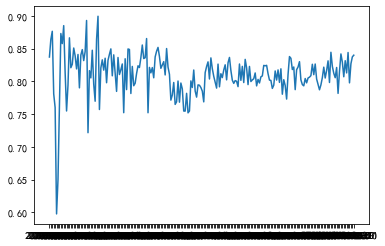

In [4]:
plt.plot(sum_data['test_dt'], sum_data['correct_rate'])

In [5]:
sum_data.to_csv(r'./test_sum_data.csv', encoding='utf_8_sig')